In [2]:
library(argparse)
library(Seurat)
library(harmony)
library(yaml)
library(dplyr)
library(harmony)
packageVersion('harmony')
library(patchwork)
library(tidyverse)

[1] ‘0.1.1’

In [4]:
results_dir <- "/home/xcx/results/uterus/6-Harmony"

counts.rna <- Matrix::readMM("/data1/xcx/unpaired-data/uterus/RNA/highvar_counts_rna.mtx")
counts.rna <- t(as.matrix(counts.rna))
rownames(counts.rna) <- paste("Gene-", seq(1, dim(counts.rna)[1]), sep = "")
colnames(counts.rna) <- paste("Cell-", seq(1, dim(counts.rna)[2]), sep = "")

counts.atac <- Matrix::readMM("/data1/xcx/unpaired-data/uterus/ATAC/uterus_Zhang2021/highvar_counts_atac.mtx")
counts.atac <- t(as.matrix(counts.atac))
rownames(counts.atac) <- paste("Region-", seq(1, dim(counts.atac)[1]), sep = "")
colnames(counts.atac) <- paste("Cell-", seq(dim(counts.rna)[2] + 1, dim(counts.rna)[2] + dim(counts.atac)[2]), sep = "")

Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.0 GiB”


In [ ]:
region2gene <- as.matrix(Matrix::readMM(file = paste0("/home/xcx/MYBenchmark-codes/1-scDART/mydata/P0/highvar_region2gene.mtx")))
rownames(region2gene) <- paste("Region-", seq(1, dim(region2gene)[1]), sep = "")
colnames(region2gene) <- paste("Gene-", seq(1, dim(region2gene)[2]), sep = "")

activity.matrix <- t(region2gene) %*% counts.atac

In [ ]:
activity_matrix =  t(as.matrix(read.csv(file = paste0("/home/xcx/MYBenchmark-codes/6-Harmony/mydata/scaled_activity_matrix.csv"), header = TRUE)))

In [5]:
rownames(activity_matrix) <- paste("Gene-", seq(1, dim(activity_matrix)[1]), sep = "")
colnames(activity_matrix) <- paste("Cell-", seq(dim(activity_matrix)[2]+1, dim(activity_matrix)[2]+dim(counts.rna)[2]), sep = "")

In [7]:
rna.so <- CreateSeuratObject(counts = counts.rna, assay = "snare", project = "scRNA-seq")
atac.so <- CreateSeuratObject(counts = counts.atac, assay = "snare", project = "scATAC-seq")
atac.so <- NormalizeData(atac.so)

rna.so$domain <- c(rep("scRNA-seq"))
atac.so$domain <- c(rep("scATAC-seq"))

combined.so <- merge(rna.so, atac.so)
combined.so
head(combined.so)
table(combined.so[[]]$orig.ident)
# combined.so[[]]$orig.ident

An object of class Seurat 
33524 features across 16551 samples within 1 assay 
Active assay: snare (33524 features, 0 variable features)

,orig.ident,nCount_snare,nFeature_snare,domain
,<chr>,<dbl>,<int>,<chr>
Cell-1,scRNA-seq,-114.27531,68,scRNA-seq
Cell-2,scRNA-seq,-70.50512,84,scRNA-seq
Cell-3,scRNA-seq,-155.78428,36,scRNA-seq
Cell-4,scRNA-seq,-118.36841,43,scRNA-seq
Cell-5,scRNA-seq,-122.55353,83,scRNA-seq
Cell-6,scRNA-seq,-149.06115,24,scRNA-seq
Cell-7,scRNA-seq,-123.71066,60,scRNA-seq
Cell-8,scRNA-seq,-118.33446,42,scRNA-seq
Cell-9,scRNA-seq,-132.32390,31,scRNA-seq



scATAC-seq  scRNA-seq 
      8314       8237 

In [8]:
start_time <- proc.time()
combined.so <- NormalizeData(combined.so)
# VariableFeatures(combined.so) <- hvg
combined.so <- FindVariableFeatures(combined.so, selection.method = "vst", verbose = FALSE)
combined.so <- ScaleData(combined.so)
# combined.so <- SCTransform(combined.so)
combined.so <- RunPCA(combined.so, npcs = 50, seed.use = 0, verbose = FALSE)

Warning message in eval(predvars, data, env):
“NaNs produced”
Warning message in hvf.info$variance.expected[not.const] <- 10^fit$fitted:
“number of items to replace is not a multiple of replacement length”
Centering and scaling data matrix



In [9]:
# VariableFeatures(combined.so)
combined.so
head(combined.so[10000:10090,])
combined.so@assays$ATAC

An object of class Seurat 
33524 features across 16551 samples within 1 assay 
Active assay: snare (33524 features, 2000 variable features)
 1 dimensional reduction calculated: pca

,orig.ident,nCount_snare,nFeature_snare,domain
,<chr>,<dbl>,<int>,<chr>
Cell-1,scRNA-seq,0,0,scRNA-seq
Cell-2,scRNA-seq,0,0,scRNA-seq
Cell-3,scRNA-seq,0,0,scRNA-seq
Cell-4,scRNA-seq,0,0,scRNA-seq
Cell-5,scRNA-seq,0,0,scRNA-seq
Cell-6,scRNA-seq,0,0,scRNA-seq
Cell-7,scRNA-seq,0,0,scRNA-seq
Cell-8,scRNA-seq,0,0,scRNA-seq
Cell-9,scRNA-seq,0,0,scRNA-seq


NULL

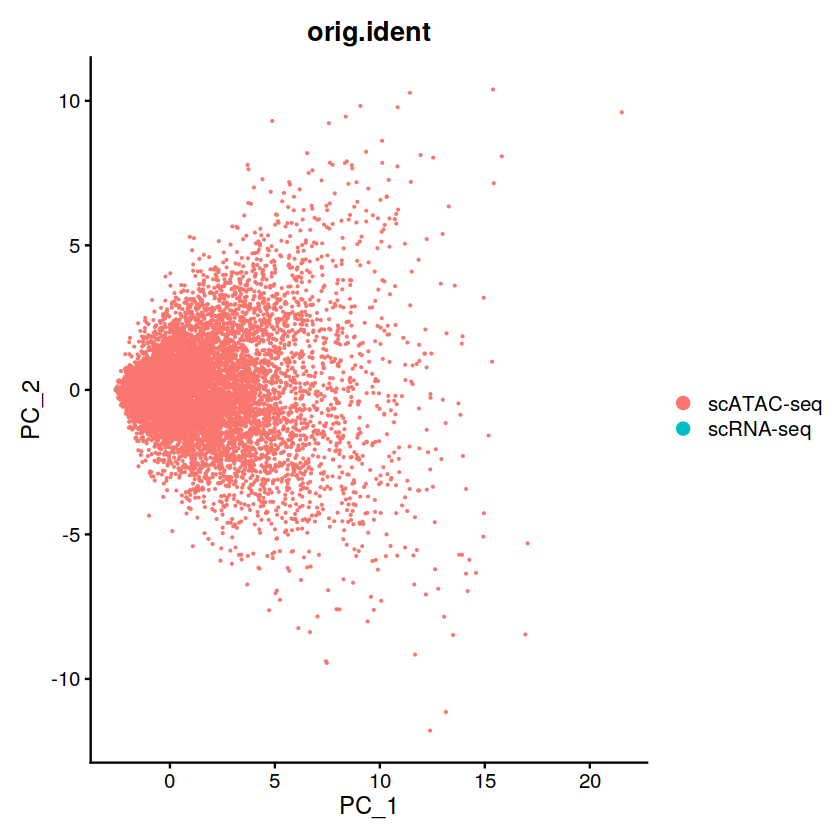

In [10]:
p1 <- DimPlot(object = combined.so, pt.size = .1, group.by = "orig.ident")
p1

Harmony 1/20

Harmony 2/20

Harmony 3/20

Harmony 4/20

Harmony 5/20

Harmony 6/20

Harmony 7/20

Harmony 8/20

Harmony 9/20

Harmony 10/20

Harmony 11/20

Harmony 12/20

Harmony 13/20

Harmony 14/20

Harmony 15/20

Harmony 16/20

Harmony 17/20

Harmony 18/20

Harmony 19/20

Harmony 20/20

Warning message:
“Invalid name supplied, making object name syntactically valid. New object name is Seurat..ProjectDim.snare.harmony; see ?make.names for more details on syntax validity”


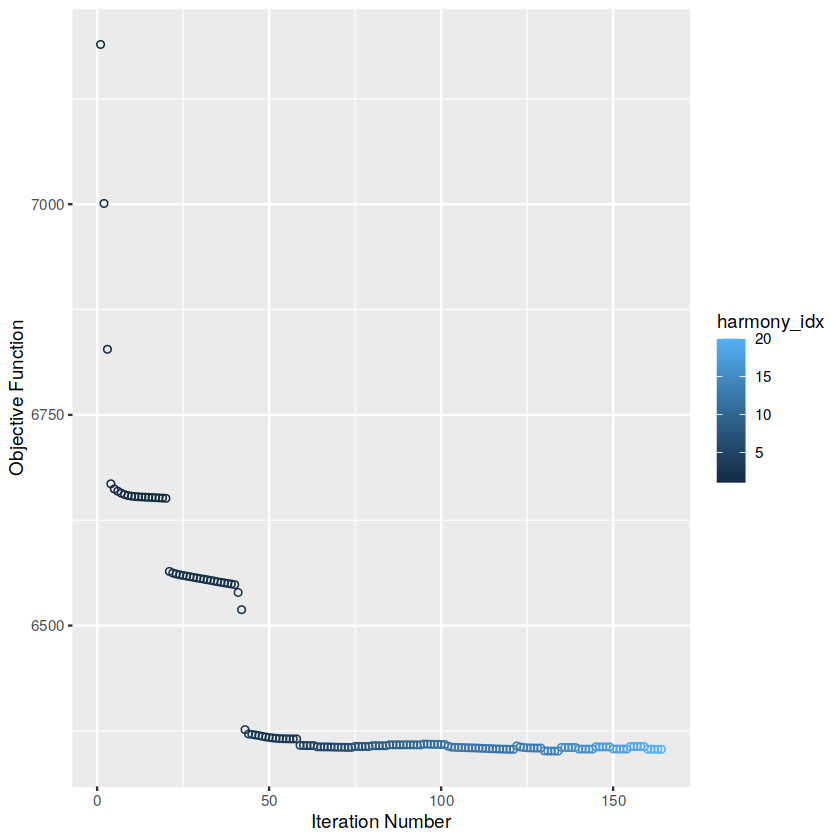

In [11]:
combined.so_harmony <- RunHarmony(combined.so, plot_convergence = TRUE, group.by.vars = "domain", max.iter.harmony = 20, lambda = 0.1, epsilon.harmony=-Inf)
elapsed_time <- proc.time() - start_time

In [12]:
elapsed_time

    user   system  elapsed 
 756.484 1380.410   77.222 

In [13]:
harmony_embeddings <- Embeddings(combined.so_harmony, reduction='harmony')
harmony_embeddings[(dim(counts.rna)[2]+1):10162,]

,harmony_1,harmony_2,harmony_3,harmony_4,harmony_5,harmony_6,harmony_7,harmony_8,harmony_9,harmony_10,⋯,harmony_41,harmony_42,harmony_43,harmony_44,harmony_45,harmony_46,harmony_47,harmony_48,harmony_49,harmony_50
Cell-8238,-0.705042119,0.06004123,-0.80464597,2.4131823,3.05779221,-1.35043502,1.26635313,-4.28730110,-2.97947070,2.66897587,⋯,1.00526555,-0.03521155,-1.541916371,0.17916288,-0.06629688,0.19759607,-0.02743910,0.71087529,0.69342145,-0.81719612
Cell-8239,0.897385740,0.39269922,-0.45894537,-0.9975928,-2.04143543,0.60395704,0.73291459,-0.14051821,-2.43725219,-0.86464625,⋯,1.20547683,0.30836720,2.065936822,1.45185305,-2.28201260,1.72738285,2.15796519,0.50417683,-2.52344517,0.95614877
Cell-8240,-1.963437912,-0.20035388,0.05316180,-0.5846130,-0.43854216,-0.01921869,-0.19440206,0.43538821,-0.58555887,0.17314406,⋯,0.12330447,-0.62996575,0.560609079,-0.31859446,1.31751371,-1.35468804,0.12199929,0.03094576,-1.27282606,0.59086519
Cell-8241,3.341386778,2.06143304,-1.15675616,0.4525259,-1.65383191,0.91384873,1.05118078,-0.96272879,-0.33013808,-0.02503699,⋯,2.29139219,1.69824736,-0.100703101,0.19120815,-1.05185376,0.98721873,-6.26781010,-0.58428182,-1.27868978,-1.69759575
Cell-8242,-1.905585616,0.51520064,-0.49603152,-0.0546598,-0.33654888,1.29199617,0.32021964,0.13230649,2.15632060,1.15319519,⋯,0.45481444,0.57471564,0.207930612,-0.46922736,-0.02060527,-0.01562263,0.07047405,0.21270166,-0.31675181,0.25264558
Cell-8243,-0.262482010,0.42886255,-0.37519187,0.2150332,-0.26600088,-0.79119311,1.42300137,-0.04647729,-0.42924269,-0.69696001,⋯,-0.98813607,0.85067064,-0.671586901,-0.88114727,-2.31079365,-1.14603266,-1.27756213,1.43938339,2.70808214,0.02710842
Cell-8244,-0.967617566,0.36030766,-0.65864110,0.1418800,-0.58205632,-0.48886109,0.89929720,-0.02666245,0.43581752,0.21197281,⋯,-0.58005550,0.44866930,1.020689281,1.33564715,-1.66780390,0.11833718,-0.88014863,0.15284768,0.90987086,0.86017040
Cell-8245,0.790350726,0.49251235,-0.56884871,-1.4341209,1.19966864,0.62730177,-0.13248250,0.19553496,1.81325864,0.40780181,⋯,-0.16982590,1.79725346,0.655023118,-1.40610131,-0.15554023,0.38768139,-0.21846828,1.12510005,1.67304502,-0.23604842
Cell-8246,1.988427241,-2.90853946,-0.73699667,-2.4289033,-0.26258769,-2.00485070,-1.42083917,0.37910697,1.89869972,1.24106357,⋯,-0.25491714,-0.01841557,-4.041683944,2.84128527,-1.36429165,1.12050417,1.91929779,0.01529981,1.68652498,0.30439193
Cell-8247,4.158311264,-3.63510077,5.90181725,2.6913731,0.21652290,-1.37764886,1.47712814,6.47255197,-3.94307142,5.54285136,⋯,-1.11255238,1.08968512,1.892735953,-2.87573975,-3.52500588,-2.50096399,1.89835728,0.35201513,-1.12601833,0.92601413


In [186]:
# combined.so_harmony
combined.so_harmony@reductions[["harmony"]]

harmony_ 1 
Positive:  Gene-583, Gene-54, Gene-307, Gene-855, Gene-64, Gene-585, Gene-239, Gene-373, Gene-660, Gene-1 
	   Gene-559, Gene-427, Gene-55, Gene-368, Gene-7, Gene-999, Gene-387, Gene-156, Gene-150, Gene-345 
Negative:  Gene-79, Gene-219, Gene-587, Gene-227, Gene-611, Gene-626, Gene-58, Gene-242, Gene-97, Gene-592 
	   Gene-825, Gene-538, Gene-531, Gene-705, Gene-526, Gene-378, Gene-493, Gene-220, Gene-57, Gene-215 
harmony_ 2 
Positive:  Gene-826, Gene-458, Gene-850, Gene-959, Gene-559, Gene-462, Gene-88, Gene-438, Gene-69, Gene-230 
	   Gene-106, Gene-55, Gene-492, Gene-832, Gene-920, Gene-185, Gene-172, Gene-568, Gene-329, Gene-737 
Negative:  Gene-79, Gene-242, Gene-219, Gene-227, Gene-58, Gene-611, Gene-587, Gene-705, Gene-825, Gene-883 
	   Gene-493, Gene-413, Gene-325, Gene-526, Gene-538, Gene-378, Gene-57, Gene-555, Gene-626, Gene-592 
harmony_ 3 
Positive:  Gene-462, Gene-850, Gene-205, Gene-204, Gene-824, Gene-241, Gene-492, Gene-329, Gene-185, Gene-474 
	   Gene-8

In [14]:
combined.so_harmony <- FindNeighbors(combined.so_harmony, reduction = "harmony", dims = 1:30) %>% FindClusters(resolution = 0.5)
combined.so_harmony <- RunUMAP(combined.so_harmony, reduction = "harmony", dims = 1:30, verbose = FALSE)

Computing nearest neighbor graph

Computing SNN



Modularity Optimizer version 1.3.0 by Ludo Waltman and Nees Jan van Eck

Number of nodes: 16551
Number of edges: 2009570

Running Louvain algorithm...
Maximum modularity in 10 random starts: 0.9741
Number of communities: 22
Elapsed time: 4 seconds


Warning message:
“The default method for RunUMAP has changed from calling Python UMAP via reticulate to the R-native UWOT using the cosine metric
To use Python UMAP via reticulate, set umap.method to 'umap-learn' and metric to 'correlation'
This message will be shown once per session”


Warning message:
“CombinePlots is being deprecated. Plots should now be combined using the patchwork system.”


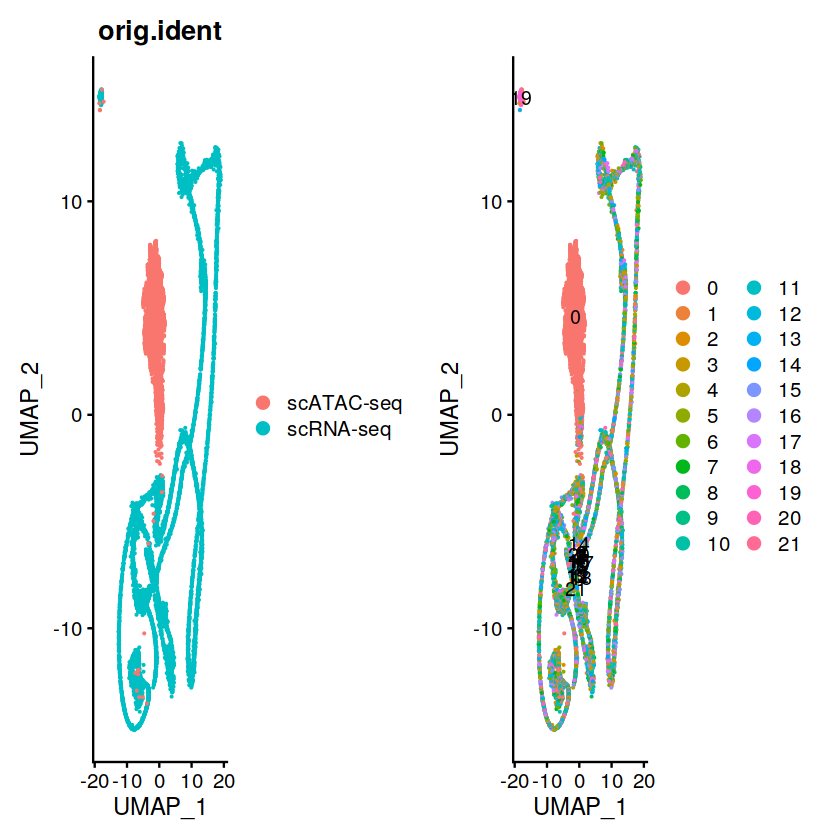

In [15]:
umap_integrated1 <- DimPlot(combined.so_harmony, reduction = "umap", group.by = "orig.ident")
umap_integrated2 <- DimPlot(combined.so_harmony, reduction = "umap", label = TRUE)

umap_tsne_integrated <- CombinePlots(list(umap_integrated1,umap_integrated2),ncol=2)
umap_tsne_integrated
ggsave("/home/xcx/results/uterus/6-Harmony/umap_tsne_integrated.pdf",umap_tsne_integrated,wi=25,he=15)

In [ ]:
library(data.table)
# data_to_write_out <- as.data.frame(as.matrix(coembed[['RNA']]))
data_to_write_out <- as.data.frame(as.matrix(harmony_embeddings[colnames(rna.so),]))
fwrite(x = data_to_write_out, file = "/home/xcx/results/uterus/6-Harmony/z_rna.csv")

data_to_write_out <- as.data.frame(as.matrix(harmony_embeddings[colnames(atac.so),]))
fwrite(x = data_to_write_out, file = "/home/xcx/results/uterus/6-Harmony/z_atac.csv")